In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pylab
import random

In this problem, you will perform simulations of two random walkers on a 2-d lattice.  The walkers randomly choose any neighboring site to move to in their next step, simultaneously.  You are free to choose the initial locations of both walkers, but should describe the initial conditions in your solutions.  You should perform $N$ copies of the simulation described, where you are free to choose $N$ so that the statistics of your simulation are ``reasonable'' (and specify $N$ and your reasoning for choosing it in the solutions). 

In [10]:
class RandomWalk():
    
    def __init__(self, x0, y0, nsims, nsteps):
        
        self.x0 = x0
        self.y0 = y0
        self.nsims = nsims
        self.nsteps = nsteps
    
    def preformWalk(self):
        """
        Preform a unbiased random walk on a 2D plane with nsteps, returning the trajectory in a np array
        """
        
        x = np.zeros(self.nsteps)
        y = np.zeros(self.nsteps)
        
        for i in range(1, self.nsteps):
            val = random.randint(1, 4)
            if val == 1:
                x[i] = x[i - 1] + 1
                y[i] = y[i - 1]
            elif val == 2:
                x[i] = x[i - 1] - 1
                y[i] = y[i - 1]
            elif val == 3:
                x[i] = x[i - 1]
                y[i] = y[i - 1] + 1
            else:
                x[i] = x[i - 1]
                y[i] = y[i - 1] - 1
                
        return x,y
    
    def plotTrajectory(self): 
        xi, yi = self.preformWalk()
        pylab.title("Random Walk ($n = " + str(self.nsteps) + "$ steps)")
        pylab.plot(xi, yi)
        pylab.show()
        
    def calculate_average_position(self):
        pass

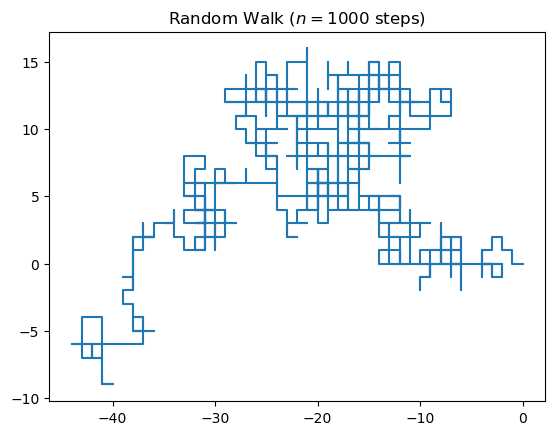

In [12]:
walker1 = RandomWalk(5,5,1,1000)
walker1.plotTrajectory()

# a) 

Defining $\mathbf{x}_n$ and $\mathbf{y}_n$ the position of the first and second walker (respectively) after the $n^{th}$ step, plot $\langle(\mathbf{x}_n-\mathbf{x}_0)^2\rangle$, $\langle(\mathbf{y}_n-\mathbf{y}_0)^2\rangle$, and $\langle((\mathbf{x}_n-\mathbf{y}_n)-(\mathbf{x}_0-\mathbf{y}_0))^2\rangle$ in the same figure, with axes labeled and standard errors shown.  Comment on the effective diffusion coefficient of these three processes.

# b)

Based on your results in a), do you think that two random walkers will encounter each other (that is, occupy the same location) more often if both move, or if only one moves.  You should {\it{not}} try to answer this question by simulating more than was done in a), nor should you try to compute additional statistics beyond those computed in a).  Just explain your reasoning.